# A Very Simple Cartoonify of An Image

In [1]:
from IPython.display import ProgressBar
from ipywidgets import interact, interact_manual, Text
import sys, os
from io import BytesIO
import urllib
import numpy as np
from matplotlib import pyplot as mp
import PIL.Image, PIL.ImageFilter
print('sys.platform:',sys.platform)

sys.platform: linux


In [2]:
def urlgetimg(url):
    with urllib.request.urlopen(url) as response:
        data = response.read()
    if not isinstance(data,bytes):
        print('download not bytes,',type(data))
        return
    return PIL.Image.open(BytesIO(data))

def cartoonify(img,boxblur,colors):
    img = img.filter(PIL.ImageFilter.BoxBlur(boxblur))
    img = img.convert(mode="P",palette=PIL.Image.ADAPTIVE,colors=colors)
    return img

def ax_imshow(img):
    ax = mp.gca()
    ax.imshow(img)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

def showcartoonify(img,boxblur,colors):
    fig = mp.figure(figsize=(10,8))
    ax = mp.subplot(1,2,1)
    ax_imshow(img)
    ax.set_title('original')
    ax = mp.subplot(1,2,2)
    ax_imshow(cartoonify(img,boxblur,colors))
    ax.set_title('cartoon')
    mp.tight_layout()
    mp.show()

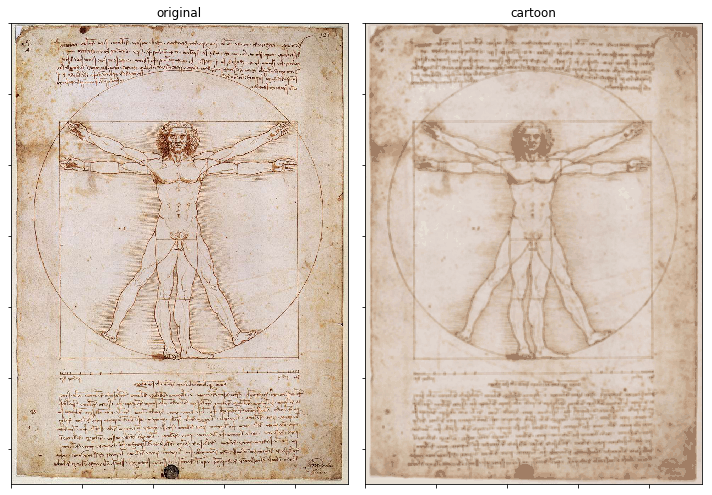

In [3]:
showcartoonify(
    urlgetimg('https://upload.wikimedia.org/wikipedia/commons/1/17/Vitruvian.jpg'),
    boxblur=3,colors=32)

In [4]:
def democartoonify():
    def run(url):
        if url == "" or not url.startswith('http'):
            return
        img = urlgetimg(url)
        def show(boxblur,colors):
            showcartoonify(img,boxblur,colors)
        interact_manual(show,boxblur=(3,7),colors=(8,32,8))
    interact(run,url=Text(layout={'width':'86%'}))

interact_manual.opts['manual_name'] = 'cartoonify'
democartoonify()

interactive(children=(Text(value='', description='url', layout=Layout(width='86%')), Output()), _dom_classes=(…